In [6]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohammedabdullah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mohammedabdullah/nltk_data...


True

In [7]:
# Import the libraries
import re
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Fetch the data
newsgroups = fetch_20newsgroups()

# Remove the headers manually
# This is a simple regex to match the header format
header_pattern = re.compile(r"^(From|Subject|Organization|Lines|Nntp-Posting-Host|Summary|Keywords|Reply-To|Distribution|X-Newsreader|Article-I.D.):.*\n")

# This is a list to store the cleaned documents
cleaned_data = []

# Loop through the documents
for doc in newsgroups.data:
  # Replace the headers with an empty string
  cleaned_doc = header_pattern.sub("", doc)
  # Append the cleaned document to the list
  cleaned_data.append(cleaned_doc)

# Tokenize the text
tokens = [word_tokenize(doc) for doc in cleaned_data]

# Normalize the text
lemmatizer = WordNetLemmatizer()
normalized = [[lemmatizer.lemmatize(token.lower()) for token in doc] for doc in tokens]

# Vectorize the text
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(cleaned_data)



In [8]:
print(vectors)


  (0, 74532)	0.19683399907768098
  (0, 85579)	0.1463828165148702
  (0, 126828)	0.04764034591490662
  (0, 35795)	0.04196395427331691
  (0, 35016)	0.10406949547276133
  (0, 65468)	0.11004903288326384
  (0, 113033)	0.06132748856921882
  (0, 78085)	0.0667525348236511
  (0, 93262)	0.06171264149599623
  (0, 75875)	0.0769677055528322
  (0, 56827)	0.1734189611766395
  (0, 61652)	0.03250419072343961
  (0, 126812)	0.0658899647383453
  (0, 66522)	0.08155756607517049
  (0, 122458)	0.09130933768117623
  (0, 89205)	0.03549030238386194
  (0, 62772)	0.09281933476696244
  (0, 77918)	0.0705306832099012
  (0, 122500)	0.060072348816136656
  (0, 95025)	0.120457435090057
  (0, 126445)	0.06746304348271318
  (0, 107936)	0.12085582586671716
  (0, 51315)	0.1080838159032883
  (0, 85007)	0.07793844758684405
  (0, 82308)	0.09840039056314308
  :	:
  (11313, 86604)	0.045480241677514535
  (11313, 29944)	0.03953431678726824
  (11313, 75536)	0.07000397369229691
  (11313, 84372)	0.04217308875147323
  (11313, 118233)	0.0

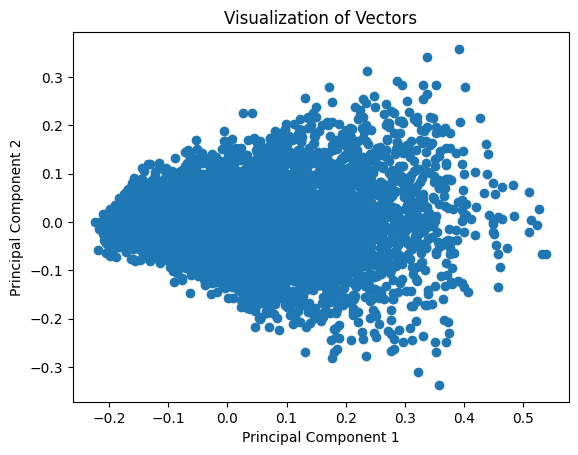

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the dimensionality of the vectors
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors.toarray())

# Plot the reduced vectors
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of Vectors')
plt.show()
